In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
import seaborn as sns
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Pregnancies : Number of times pregnant
# Glucose : 포도당 부하 검사 수치
# BloodPressure : Diastolic blood pressure (mm Hg)
# SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
# Insulin : 2-Hour serum insulin (mu U/ml)
# BMI : Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction : 당뇨 내력 가중치값
# Age : Age (years)
# Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
for i in df.columns :
    print(i, "\n",df[i].value_counts())

Pregnancies 
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
Glucose 
 100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
BloodPressure 
 70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64
SkinThickness 
 0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [209]:
#  천ver get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion, accuracy, precision, recall, f1, roc_auc
####

In [46]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [47]:
def precision_recall_curve_plot2(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_range = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_range],'r')
    plt.plot(thresholds, recalls[:threshold_range], 'b:')
    
    s, e = plt.xlim()
    plt.xticks(np.round(np.arange(s,e,0.1),2))
    
    plt.legend()
    plt.show()

In [92]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=11)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(576, 8) (576,) (192, 8) (192,)


In [93]:
lr_clf = LogisticRegression(random_state=11, max_iter=X.shape[0])
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_c1 = pred_proba[:,1]

In [94]:
get_clf_eval(y_test, pred, pred_proba_c1)

# 오차 행렬
# [[110  15]
#  [ 28  39]]
# 정확도: 0.7760, 정밀도: 0.7222, 재현율: 0.5821, F1: 0.6446, AUC:0.8536

오차 행렬
[[110  15]
 [ 28  39]]
정확도: 0.7760, 정밀도: 0.7222, 재현율: 0.5821, F1: 0.6446, AUC:0.8536


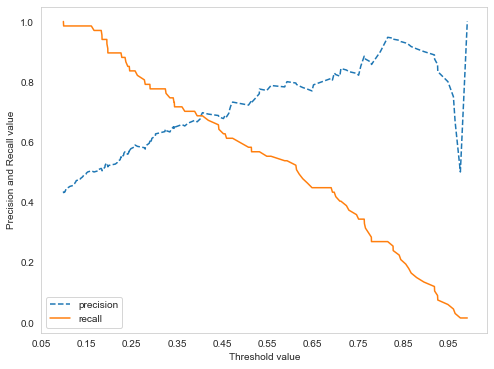

In [95]:
precision_recall_curve_plot(y_test, pred_proba_c1)

No handles with labels found to put in legend.


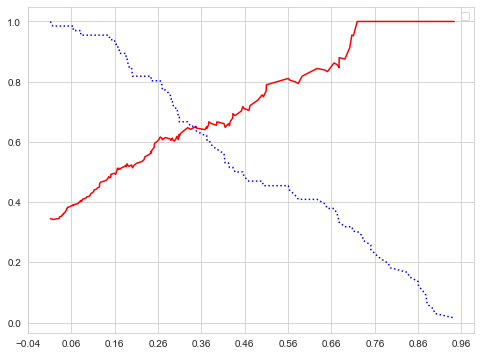

In [52]:
precision_recall_curve_plot2(y_test, pred_proba_c1)

In [70]:
pre, recall, thresh = precision_recall_curve(y_test, pred_proba_c1)
pre.shape, recall.shape, thresh.shape

((192,), (192,), (191,))

In [73]:
pre = pre[:-1]
recall = recall[:-1]

for p, r, t in list(zip(pre, recall, thresh)) :
    if p == r :
        print(t)
        print(p, r)

0.34714588253400236
0.6515151515151515 0.6515151515151515


In [75]:
recall.shape

(191,)

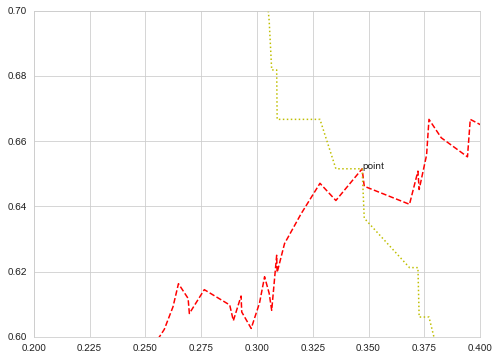

In [79]:
plt.figure(figsize=(8,6))
plt.plot(thresh, pre, 'r--')
plt.plot(thresh, recall, 'y:')
plt.xlim(0.2, 0.4)
plt.ylim(0.6, 0.7)
plt.text(0.34714588253400236, 0.6515151515151515, 'point')
plt.show()

In [102]:
z_list = []
for i in df.columns :
    if 0 in df[i].values :
        print(i,"has Zero")
        z_list.append(i)
z_list.remove('Outcome')
print(z_list)

Pregnancies has Zero
Glucose has Zero
BloodPressure has Zero
SkinThickness has Zero
Insulin has Zero
BMI has Zero
Outcome has Zero
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [104]:
for z in z_list :
    print("COL:",z,"| Zeros counts",df[df[z]==0].shape[0])

COL: Pregnancies | Zeros counts 111
COL: Glucose | Zeros counts 5
COL: BloodPressure | Zeros counts 35
COL: SkinThickness | Zeros counts 227
COL: Insulin | Zeros counts 374
COL: BMI | Zeros counts 11


In [112]:
des = df.describe()
des.loc['medi'] = df.median()
des

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
medi,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000


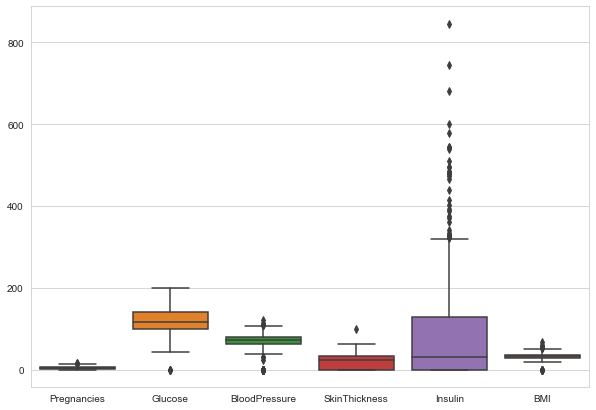

In [138]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[z_list], orient='v')
plt.show()

# 인슐린만 중앙값으로 채우기

In [156]:
z_list2 = z_list.copy()
z_list2.remove('Insulin')
df_fill = df[z_list2]

In [157]:
df_fill.mean()

Pregnancies        3.845052
Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
BMI               31.992578
dtype: float64

In [158]:
df_fill.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI
0,6,148,72,35,33.6
1,1,85,66,29,26.6
2,8,183,64,0,23.3
3,1,89,66,23,28.1
4,0,137,40,35,43.1


In [159]:
for i in z_list2 :
    df_fill[i] = np.where(df_fill[i]== 0, np.round(df_fill[i].mean(),1), df_fill[i])
df_fill.head()

C:\Users\1000\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI
0,6.0,148.0,72.0,35.0,33.6
1,1.0,85.0,66.0,29.0,26.6
2,8.0,183.0,64.0,20.5,23.3
3,1.0,89.0,66.0,23.0,28.1
4,3.8,137.0,40.0,35.0,43.1


In [161]:
df[z_list2] = df_fill
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64.0,20.5,0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21,0
4,3.8,137.0,40.0,35.0,168,43.1,2.288,33,1


In [163]:
df[df['Insulin']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64.0,20.5,0,23.3,0.672,32,1
5,5.0,116.0,74.0,20.5,0,25.6,0.201,30,0
7,10.0,115.0,69.1,20.5,0,35.3,0.134,29,0


In [165]:
df['Insulin'] = np.where(df['Insulin']==0, df['Insulin'].median(), df['Insulin'])
df[df['Insulin']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [166]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64.0,20.5,30.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,3.8,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [171]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

sc = StandardScaler()
sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=12)

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba_c1)

오차 행렬
[[107  18]
 [ 23  44]]
정확도: 0.7865, 정밀도: 0.7097, 재현율: 0.6567, F1: 0.6822, AUC:0.8843


In [185]:
thresholds = np.arange(0.1, 0.95, 0.05)
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])

In [216]:
from sklearn.preprocessing import Binarizer

def get_eval_threshold(y_test, pred_proba_c1) :
    thresholds = np.arange(0.3, 0.89, 0.03)
    confusions, accuracys, precisions, recalls, f1s, roc_aucs, threshs = [],[],[],[],[],[],[]
    for t in thresholds :
        binarizer = Binarizer(threshold=t).fit(pred_proba_c1)
        imp_predict = binarizer.transform(pred_proba_c1)
        print("Threshold :", t)
        confusion, accuracy, precision, recall, f1, roc_auc = get_clf_eval(y_test , imp_predict, pred_proba_c1)
        confusions.append(confusion)
        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        roc_aucs.append(roc_auc)
        threshs.append(t)
        print()
    score_df = pd.DataFrame({'confusion' : confusions, 'acc':accuracys, 'pre':precisions,
                             'recalls':recalls, 'f1':f1s, 'roc':roc_aucs, 'threshold':threshs})
    return score_df

In [217]:
pred_proba = lr_clf.predict_proba(x_test)
score_df = get_eval_threshold(y_test,pred_proba[:,1].reshape(-1,1))
score_df

Threshold : 0.3
오차 행렬
[[97 28]
 [11 56]]
정확도: 0.7969, 정밀도: 0.6667, 재현율: 0.8358, F1: 0.7417, AUC:0.8843

Threshold : 0.32999999999999996
오차 행렬
[[101  24]
 [ 13  54]]
정확도: 0.8073, 정밀도: 0.6923, 재현율: 0.8060, F1: 0.7448, AUC:0.8843

Threshold : 0.35999999999999993
오차 행렬
[[103  22]
 [ 18  49]]
정확도: 0.7917, 정밀도: 0.6901, 재현율: 0.7313, F1: 0.7101, AUC:0.8843

Threshold : 0.3899999999999999
오차 행렬
[[106  19]
 [ 19  48]]
정확도: 0.8021, 정밀도: 0.7164, 재현율: 0.7164, F1: 0.7164, AUC:0.8843

Threshold : 0.4199999999999999
오차 행렬
[[106  19]
 [ 22  45]]
정확도: 0.7865, 정밀도: 0.7031, 재현율: 0.6716, F1: 0.6870, AUC:0.8843

Threshold : 0.44999999999999984
오차 행렬
[[107  18]
 [ 22  45]]
정확도: 0.7917, 정밀도: 0.7143, 재현율: 0.6716, F1: 0.6923, AUC:0.8843

Threshold : 0.4799999999999998
오차 행렬
[[107  18]
 [ 23  44]]
정확도: 0.7865, 정밀도: 0.7097, 재현율: 0.6567, F1: 0.6822, AUC:0.8843

Threshold : 0.5099999999999998
오차 행렬
[[108  17]
 [ 23  44]]
정확도: 0.7917, 정밀도: 0.7213, 재현율: 0.6567, F1: 0.6875, AUC:0.8843

Threshold : 0.5399999999999998
오

,confusion,acc,pre,recalls,f1,roc,threshold
0,"[[97, 28], [11, 56]]",0.796875,0.666667,0.835821,0.741722,0.884299,0.30
1,"[[101, 24], [13, 54]]",0.807292,0.692308,0.805970,0.744828,0.884299,0.33
2,"[[103, 22], [18, 49]]",0.791667,0.690141,0.731343,0.710145,0.884299,0.36
3,"[[106, 19], [19, 48]]",0.802083,0.716418,0.716418,0.716418,0.884299,0.39
4,"[[106, 19], [22, 45]]",0.786458,0.703125,0.671642,0.687023,0.884299,0.42
5,"[[107, 18], [22, 45]]",0.791667,0.714286,0.671642,0.692308,0.884299,0.45
6,"[[107, 18], [23, 44]]",0.786458,0.709677,0.656716,0.682171,0.884299,0.48
7,"[[108, 17], [23, 44]]",0.791667,0.721311,0.656716,0.687500,0.884299,0.51
8,"[[110, 15], [24, 43]]",0.796875,0.741379,0.641791,0.688000,0.884299,0.54
9,"[[115, 10], [24, 43]]",0.822917,0.811321,0.641791,0.716667,0.884299,0.57


In [220]:
score_df.sort_values(['f1','recalls'], ascending=False)

,confusion,acc,pre,recalls,f1,roc,threshold
1,"[[101, 24], [13, 54]]",0.807292,0.692308,0.805970,0.744828,0.884299,0.33
0,"[[97, 28], [11, 56]]",0.796875,0.666667,0.835821,0.741722,0.884299,0.30
9,"[[115, 10], [24, 43]]",0.822917,0.811321,0.641791,0.716667,0.884299,0.57
3,"[[106, 19], [19, 48]]",0.802083,0.716418,0.716418,0.716418,0.884299,0.39
2,"[[103, 22], [18, 49]]",0.791667,0.690141,0.731343,0.710145,0.884299,0.36
10,"[[115, 10], [26, 41]]",0.812500,0.803922,0.611940,0.694915,0.884299,0.60
5,"[[107, 18], [22, 45]]",0.791667,0.714286,0.671642,0.692308,0.884299,0.45
8,"[[110, 15], [24, 43]]",0.796875,0.741379,0.641791,0.688000,0.884299,0.54
7,"[[108, 17], [23, 44]]",0.791667,0.721311,0.656716,0.687500,0.884299,0.51
4,"[[106, 19], [22, 45]]",0.786458,0.703125,0.671642,0.687023,0.884299,0.42


In [231]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(randomstate=11)
lgbm.fit(x_train, y_train)
pred_lgbm = lgbm.predict(x_test)
pred_l_proba = lgbm.predict_proba(x_test)[:,1]
score_df2 = get_eval_threshold(y_test,pred_l_proba.reshape(-1,1))
score_df2

Threshold : 0.3
오차 행렬
[[94 31]
 [14 53]]
정확도: 0.7656, 정밀도: 0.6310, 재현율: 0.7910, F1: 0.7020, AUC:0.8408

Threshold : 0.32999999999999996
오차 행렬
[[94 31]
 [15 52]]
정확도: 0.7604, 정밀도: 0.6265, 재현율: 0.7761, F1: 0.6933, AUC:0.8408

Threshold : 0.35999999999999993
오차 행렬
[[94 31]
 [19 48]]
정확도: 0.7396, 정밀도: 0.6076, 재현율: 0.7164, F1: 0.6575, AUC:0.8408

Threshold : 0.3899999999999999
오차 행렬
[[95 30]
 [19 48]]
정확도: 0.7448, 정밀도: 0.6154, 재현율: 0.7164, F1: 0.6621, AUC:0.8408

Threshold : 0.4199999999999999
오차 행렬
[[96 29]
 [20 47]]
정확도: 0.7448, 정밀도: 0.6184, 재현율: 0.7015, F1: 0.6573, AUC:0.8408

Threshold : 0.44999999999999984
오차 행렬
[[99 26]
 [21 46]]
정확도: 0.7552, 정밀도: 0.6389, 재현율: 0.6866, F1: 0.6619, AUC:0.8408

Threshold : 0.4799999999999998
오차 행렬
[[101  24]
 [ 22  45]]
정확도: 0.7604, 정밀도: 0.6522, 재현율: 0.6716, F1: 0.6618, AUC:0.8408

Threshold : 0.5099999999999998
오차 행렬
[[101  24]
 [ 22  45]]
정확도: 0.7604, 정밀도: 0.6522, 재현율: 0.6716, F1: 0.6618, AUC:0.8408

Threshold : 0.5399999999999998
오차 행렬
[[101  24]
 [ 2

,confusion,acc,pre,recalls,f1,roc,threshold
0,"[[94, 31], [14, 53]]",0.765625,0.630952,0.791045,0.701987,0.840836,0.30
1,"[[94, 31], [15, 52]]",0.760417,0.626506,0.776119,0.693333,0.840836,0.33
2,"[[94, 31], [19, 48]]",0.739583,0.607595,0.716418,0.657534,0.840836,0.36
3,"[[95, 30], [19, 48]]",0.744792,0.615385,0.716418,0.662069,0.840836,0.39
4,"[[96, 29], [20, 47]]",0.744792,0.618421,0.701493,0.657343,0.840836,0.42
5,"[[99, 26], [21, 46]]",0.755208,0.638889,0.686567,0.661871,0.840836,0.45
6,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.48
7,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.51
8,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.54
9,"[[103, 22], [23, 44]]",0.765625,0.666667,0.656716,0.661654,0.840836,0.57


In [234]:
score_df2.sort_values(['f1','recalls'],ascending=False)

,confusion,acc,pre,recalls,f1,roc,threshold
0,"[[94, 31], [14, 53]]",0.765625,0.630952,0.791045,0.701987,0.840836,0.30
1,"[[94, 31], [15, 52]]",0.760417,0.626506,0.776119,0.693333,0.840836,0.33
3,"[[95, 30], [19, 48]]",0.744792,0.615385,0.716418,0.662069,0.840836,0.39
5,"[[99, 26], [21, 46]]",0.755208,0.638889,0.686567,0.661871,0.840836,0.45
6,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.48
7,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.51
8,"[[101, 24], [22, 45]]",0.760417,0.652174,0.671642,0.661765,0.840836,0.54
9,"[[103, 22], [23, 44]]",0.765625,0.666667,0.656716,0.661654,0.840836,0.57
2,"[[94, 31], [19, 48]]",0.739583,0.607595,0.716418,0.657534,0.840836,0.36
4,"[[96, 29], [20, 47]]",0.744792,0.618421,0.701493,0.657343,0.840836,0.42


In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=11)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
pred_rf_proba = rf.predict_proba(x_test)[:,1]
score_df3 = get_eval_threshold(y_test,pred_rf_proba.reshape(-1,1))
score_df3

Threshold : 0.3
오차 행렬
[[90 35]
 [ 7 60]]
정확도: 0.7812, 정밀도: 0.6316, 재현율: 0.8955, F1: 0.7407, AUC:0.8627

Threshold : 0.32999999999999996
오차 행렬
[[93 32]
 [ 9 58]]
정확도: 0.7865, 정밀도: 0.6444, 재현율: 0.8657, F1: 0.7389, AUC:0.8627

Threshold : 0.35999999999999993
오차 행렬
[[97 28]
 [10 57]]
정확도: 0.8021, 정밀도: 0.6706, 재현율: 0.8507, F1: 0.7500, AUC:0.8627

Threshold : 0.3899999999999999
오차 행렬
[[99 26]
 [13 54]]
정확도: 0.7969, 정밀도: 0.6750, 재현율: 0.8060, F1: 0.7347, AUC:0.8627

Threshold : 0.4199999999999999
오차 행렬
[[100  25]
 [ 16  51]]
정확도: 0.7865, 정밀도: 0.6711, 재현율: 0.7612, F1: 0.7133, AUC:0.8627

Threshold : 0.44999999999999984
오차 행렬
[[106  19]
 [ 18  49]]
정확도: 0.8073, 정밀도: 0.7206, 재현율: 0.7313, F1: 0.7259, AUC:0.8627

Threshold : 0.4799999999999998
오차 행렬
[[107  18]
 [ 20  47]]
정확도: 0.8021, 정밀도: 0.7231, 재현율: 0.7015, F1: 0.7121, AUC:0.8627

Threshold : 0.5099999999999998
오차 행렬
[[109  16]
 [ 24  43]]
정확도: 0.7917, 정밀도: 0.7288, 재현율: 0.6418, F1: 0.6825, AUC:0.8627

Threshold : 0.5399999999999998
오차 행렬
[[111  

,confusion,acc,pre,recalls,f1,roc,threshold
0,"[[90, 35], [7, 60]]",0.781250,0.631579,0.895522,0.740741,0.862687,0.30
1,"[[93, 32], [9, 58]]",0.786458,0.644444,0.865672,0.738854,0.862687,0.33
2,"[[97, 28], [10, 57]]",0.802083,0.670588,0.850746,0.750000,0.862687,0.36
3,"[[99, 26], [13, 54]]",0.796875,0.675000,0.805970,0.734694,0.862687,0.39
4,"[[100, 25], [16, 51]]",0.786458,0.671053,0.761194,0.713287,0.862687,0.42
5,"[[106, 19], [18, 49]]",0.807292,0.720588,0.731343,0.725926,0.862687,0.45
6,"[[107, 18], [20, 47]]",0.802083,0.723077,0.701493,0.712121,0.862687,0.48
7,"[[109, 16], [24, 43]]",0.791667,0.728814,0.641791,0.682540,0.862687,0.51
8,"[[111, 14], [26, 41]]",0.791667,0.745455,0.611940,0.672131,0.862687,0.54
9,"[[113, 12], [30, 37]]",0.781250,0.755102,0.552239,0.637931,0.862687,0.57


In [239]:
score_df3.sort_values(['recalls'],ascending=False)

,confusion,acc,pre,recalls,f1,roc,threshold
0,"[[90, 35], [7, 60]]",0.781250,0.631579,0.895522,0.740741,0.862687,0.30
1,"[[93, 32], [9, 58]]",0.786458,0.644444,0.865672,0.738854,0.862687,0.33
2,"[[97, 28], [10, 57]]",0.802083,0.670588,0.850746,0.750000,0.862687,0.36
3,"[[99, 26], [13, 54]]",0.796875,0.675000,0.805970,0.734694,0.862687,0.39
4,"[[100, 25], [16, 51]]",0.786458,0.671053,0.761194,0.713287,0.862687,0.42
5,"[[106, 19], [18, 49]]",0.807292,0.720588,0.731343,0.725926,0.862687,0.45
6,"[[107, 18], [20, 47]]",0.802083,0.723077,0.701493,0.712121,0.862687,0.48
7,"[[109, 16], [24, 43]]",0.791667,0.728814,0.641791,0.682540,0.862687,0.51
8,"[[111, 14], [26, 41]]",0.791667,0.745455,0.611940,0.672131,0.862687,0.54
9,"[[113, 12], [30, 37]]",0.781250,0.755102,0.552239,0.637931,0.862687,0.57
